# Trabajo Python

In [34]:
nombres = "Jorge Escudero Ferrera; Miriam Perdiguero Bermejo; Miguel Zabaleta Sarasa"
if nombres == "":
    print("Rellena tu nombre completo!")
else:
    print("Gracias!: ", nombres, ":)")

Gracias!:  Jorge Escudero Ferrera; Miriam Perdiguero Bermejo; Miguel Zabaleta Sarasa :)


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.read_csv("Banking_Churn.csv") #cargamos los datos y paquetes básicos

**RowNumber**—corresponds to the record (row) number.  
**CustomerId**—contains random values.  
**Surname**— the surname of a customer.  
**CreditScore**— can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.  
**Geography**— customer's location.  
**Gender**— customer gender.  
**Age**— customer age.  
**Tenure**—refers to the number of years that the customer has been a client of the bank.  
**Balance**—balance in their accounts.  
**NumOfProducts**—refers to the number of products that a customer has purchased through the bank.  
**HasCrCard**—denotes whether or not a customer has a credit card.  
**IsActiveMember**— whether or not a customer is an active member of the bank.  
**EstimatedSalary**— estimated salary.  
**Churn**—whether or not the customer left the bank.  

## I. Preproceso

### 1. Exploración inicial

In [36]:
print(df.shape[0]) #número de observaciones -> 10000
print(df.shape[1]) #número de variables -> 14

10000
14


In [37]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

Destacamos que todas las variables son numéricas salvo 'Surname', 'Geography' y 'Gender'.  
Por tanto en el resto de variables podemos afirmar que no tenemos valores raros de tipo string por error de registro.

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Las variables 'RowNumber', 'CustomerId' y 'Surname' son variables de identificación.  
Decidimos usar como índice el que viene por defecto impuesto en el dataset, y por tanto eliminamos estas tres variables del dataset.

In [2]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Destacamos que la variable 'Geography' da el país al que pertenece el cliente.  
Las variables 'Gender' y 'Geography' están inputadas como variables string, será más interesante transformarlas a variables numéricas para estudiar su correlación con el resto de variables y además poder aplicar los métodos de predicción.

In [40]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Como datos interesantes podemos destacar que en nuestro dataset un 20.37% de los clientes abandonan el banco. Por tanto, tenemos unos datos **desbalanceados**. Esto se tratará más adelante.  
La edad media es de unos 39 años, la media del número de años que los clientes llevan en el banco es de 5 años, el balance medio es de 76485 (suponemos dólares americanos), el número de productos medio es 1.5, un 70% de los clientes tiene tarjeta de credito, un 51% de los clientes son clientes activos y el salario estimado medio es de 100,000$ al año.

Ademas, el mínimo valor en 'Balance' es 0. Es decir, no puede haber valores negativos en esta variable.
Algo parecido ocurre con la variable 'Age', donde no puede haber valores menores que 18.

Posteriormente, se analizará la dispersión de las variables, la correlación entre ellas y si ciertas variables individualmente tienen mucha influencia en los valores de la variable a predecir 'Churn'.

### 2. Outliers

Seguimos con la exploración de los datos:

Ahora buscaremos **outliers** en las variables, refiriéndonos a valores atípicos que puedan provenir de **errores de registro**.  
Los outliers que simplemente sean valores extremos los debemos considerar ya que forman parte de la tendencia de las predicciones, por tanto no se estudiarán en profundidad.

Comenzamos con la variable 'CreditScore'. En este enlace podemos ver qué representa:
https://www.investopedia.com/terms/c/credit_scoring.asp#:~:text=Credit%20scoring%20is%20a%20statistical,to%20extend%20or%20deny%20credit.

El CreditScore es una variable que mide el riesgo del banco por ofrecer un credito a un cliente. En otras palabras, es lo mucho o poco que un cliente se merece que le den un crédito.  
Este número varía entre **300 y 850**.

Observamos que en nuestros datos, el mínimo es de 350 y el máximo de 850 (la media es de 650), que concuerda con el rango de valores que debería tomar.  
Al ser una variable de tipo int64, concluimos que **no hay outliers**, ya que éstos serían de tipo no numérico (por tanto la variable sería de tipo object), o valores numéricos negativos o con decimales, que también hemos visto que no hay.

Lo mismo ocurre con la variable 'Age', que es de tipo int64, y el valor mínimo y máximo es respectivamente 18 y 92.

Pasamos ahora a analizar las variables en más profundidad.

En primer lugar, en cuanto a las variables 'Balance' y 'EstimatedSalary', podemos afirmar que **no hay ningún valor imputado especial** ya que se ha visto anteriormente que todas son numéricas, por tanto no hay ninguna observación con un dato de tipo string.  
Por otro lado, la variable 'Balance' no contiene outliers por errores de medición ya que de nuevo, el mínimo y el máximo son respectivamenete 0 y 250898.  
Por tanto descartamos que haya números negativos o en definitiva cantidades que no tengan sentido.

Sin embargo, en la variable 'EstimatedSalary' el mínimo y el máximo son respectivamente 11$ y 199,992\\$.  
Suponemos que son dólares al año, por tanto no tiene sentido que una persona con una cuenta bancaria tenga un sueldo de 11 dólares al año.  
Este sí es un outlier. Veremos cuáles son los mínimos valores de esta variable para ver si en efecto solo hay una observación con poco sentido.

Ahora estudiamos los valores únicos del resto de variables para ver si hay alguna imputación especial de dato missing o outliers por error de medición:

In [41]:
for col in ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Churn']:
    print(str(col),np.sort(df[str(col)].unique()))

Geography ['France' 'Germany' 'Spain']
Gender ['Female' 'Male']
Tenure [ 0  1  2  3  4  5  6  7  8  9 10]
NumOfProducts [1 2 3 4]
HasCrCard [0 1]
IsActiveMember [0 1]
Churn [0 1]


Podemos concluir que no hay ninguna imputación especial como missing, y que los países de pertenencia de los clientes son Francia, España y Alemania.  
Además, el número de años que los clientes llevan en el banco va desde 0 hasta 10 y el número de productos de 1 a 4.

Ahora estudiaremos la variable 'EstimatedSalary':

In [42]:
df.sort_values(by=['EstimatedSalary'])[['Balance','EstimatedSalary']].head(10)

,Balance,EstimatedSalary
2362,122917.71,11.58
9647,0.00,90.07
9010,121669.93,91.75
5548,0.00,96.27
4989,0.00,106.67
7565,105355.81,123.07
2498,0.00,142.81
8722,87619.29,143.34
4774,0.00,178.19
1451,0.00,216.27


Se aprecia que para los valores más pequeños de 'EstimatedSalary', o bien el balance en su cuenta es 0, o bien es un numero cerca o superior a los 100,000\\$.  
Podemos suponer que tiene sentido que los clientes con menos salario estimado tengan un balance de 0, pero no que tengan un balance cercano a 100,000\\$.  
Al ser una variable que mide el salario estimado, cabe la posibilidad de que para ciertos clientes, esa estimación se haya calculado de forma errónea o haya habido un error de registro.  
Veamos algunos valores más de esta variable:

In [43]:
df[df['Balance']>100000]['EstimatedSalary'].sort_values(ascending=True).head(20)

2362     11.58
9010     91.75
7565    123.07
1462    236.45
2046    343.38
5675    428.23
5120    440.20
925     447.73
8671    468.94
7224    479.54
7226    487.30
6956    523.00
1758    582.53
2723    598.80
195     600.36
6793    645.61
9636    667.66
9050    683.37
9920    738.88
5963    747.88
Name: EstimatedSalary, dtype: float64

Se muestran los 20 valores más pequeños de 'EstimatedSalary' para observaciones con un balance superior a 100,000\\$.  

La variable podría estar medida en miles de dólares y por tanto podrían tener sentido esos valores.
Pero suponiendo que son miles de dólares, miremos los valores más altos:

In [44]:
df.sort_values(by=['EstimatedSalary'],ascending=False)[['Balance','EstimatedSalary']].head(10)

,Balance,EstimatedSalary
6646,0.00,199992.48
3580,98635.77,199970.74
4417,153325.10,199953.33
9096,178755.84,199929.17
8926,0.00,199909.32
5958,165298.12,199862.75
1378,40169.88,199857.47
6402,155423.17,199841.32
8088,100116.67,199808.10
6125,93244.42,199805.63


In [45]:
df.drop(['EstimatedSalary'],axis=1,inplace=True) #eliminamos la variable 'EstimatedSalary'

### 3. Visualización gráfica de algunas variables

In [26]:
import seaborn as sns

In [47]:
tabla_credit_cliente = df[['CreditScore','Geography']]
by_credit = tabla_credit_cliente.sort_values('CreditScore',ascending=False)
by_credit_filter = by_credit[by_credit['CreditScore']==850]

In [48]:
#Calculamos la media del CreditScore por paises
paises_credit_mean=df.groupby(["Geography"], as_index=False)["CreditScore"].mean()

In [49]:
groupby_paises=by_credit_filter.groupby(["Geography"], as_index=False)["CreditScore"].count()
groupby_paises

,Geography,CreditScore
0,France,114
1,Germany,65
2,Spain,54


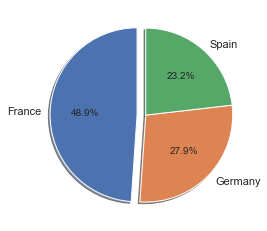

In [50]:
#Los clientes con más puntuación de crédito, los representamos en este gráfico en función del país.

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = groupby_paises['Geography']
sizes = groupby_paises['CreditScore']
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [51]:
df['Gender'].value_counts()
#En el dataset hay un 54% de hombres y un 45% de mujeres

Male      5457
Female    4543
Name: Gender, dtype: int64

In [52]:
df.groupby('Gender')['Balance'].mean()
#No hay diferencias significativas del balance entre hombres y mujeres

Gender
Female    75659.369139
Male      77173.974506
Name: Balance, dtype: float64

In [53]:
df.groupby('Geography')['Balance'].mean()
#La media del balance en España y Francia es de unos 60000, y en Alemania es de casi el doble

Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64

In [54]:
df.groupby('Geography')['CreditScore'].mean()
#La media del CreditScore en España, Francia y Alemania es muy similar

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

In [55]:
df['NumOfProducts'].value_counts()
#Número de clientes que han adquirido 1,2,3,4 productos

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [56]:
df['HasCrCard'].value_counts()
#Número de clientes que tienen una tarjeta de crédito y número que no la tienen

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [57]:
df['IsActiveMember'].value_counts()
#Número de clientes activos e inactivos

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='Age'>

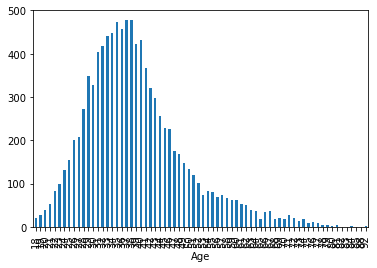

In [29]:
df.groupby('Age').count()["Tenure"].plot(kind='bar')

### 4. Información de interés en la predicción

Ahora calcularemos estadísticos y filtros de groupby para calcular información de interés.  
Es decir, variables que puedan clasificar bien la variable 'Churn'.  
No esperamos que una variable por si sola pueda predecir si un cliente deja o no el banco, pero sí encontrar indicaciones de las variables que más pueden afectar a la clasificación, una vez desarrollemos los correspondientes modelos.

In [58]:
df.groupby('Geography')['Churn'].mean()
#El porcentaje de clientes que dejan el banco es similar en Francia y España, y es el doble en Alemania

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Churn, dtype: float64

Vimos que hay un 20% de datos que dejan el banco y sin embargo un 32% de los alemanes dejan el banco.    
Por tanto el que un cliente sea alemán podría ser significativo en la predicción de que deje el banco.

In [59]:
df.groupby('Gender')['Churn'].mean()
#Un 25% de los hombres dejan el banco, y en las mujeres es un 16%
#No es una diferencia a priori significativa

Gender
Female    0.250715
Male      0.164559
Name: Churn, dtype: float64

In [60]:
df.groupby('Tenure')['Churn'].mean()
#El porcentaje de clientes que dejan el banco es cercano al 20% para todos los valores de 'Tenure'
#Por tanto por si sola no es una buena variabe de predicción de Churn

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Churn, dtype: float64

In [61]:
df.groupby('HasCrCard')['Churn'].mean()
#Lo mismo ocurre con 'HasCrCard', donde el porcentaje de salida del banco es similar a la media en todo el conjunto de datos

HasCrCard
0    0.208149
1    0.201843
Name: Churn, dtype: float64

In [62]:
df.groupby('IsActiveMember')['Churn'].mean()
#Para 'IsActiveMember' los porcentajes son similares a los de 'Gender'

IsActiveMember
0    0.268509
1    0.142691
Name: Churn, dtype: float64

In [63]:
df.groupby('NumOfProducts')['Churn'].mean()

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Churn, dtype: float64

Aquí obtenemos unos datos bastante reveladores.  
Cerca de un 7% de personas con 2 productos dejan el banco, es decir, tener 2 productos podría ser un buen indicador de que se vaya a quedar en el banco.  
Por otro lado, más de un 80% y el 100% de los clientes con 3 y 4 productos respectivamente dejan el banco.  
Por tanto tener 3 o 4 productos puede ser un buen clasificador de que vayan a dejar el banco.

Veamos el número de observaciones de cada valor para comprobar que hay suficientes:

In [64]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Aunque las observaciones con 3 y 4 productos representan un 3% de los datos, tienen un porcentaje de salida del banco demasiado alto como para ser ignorado.  
Por otra parte, casi un 46% de los datos tienen 2 productos, con un porcentaje de salida del banco muy bajo.

Por tanto concluimos que la variable 'NumOfProducts' probablemente sea decisiva en la clasificación de los clientes.

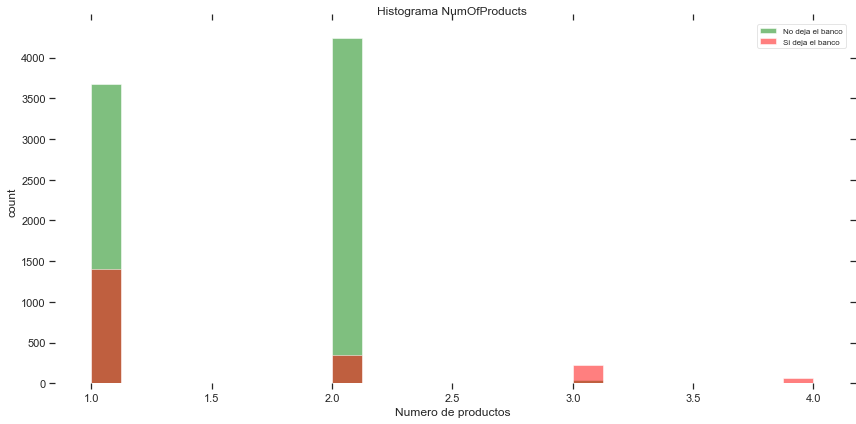

In [65]:
from sklearn.preprocessing import LabelEncoder
import math

X = df['NumOfProducts'].values
y = df['Churn'].values

label_dict = {0: 'No deja el banco', 1: 'Si deja el banco'}



feature_dict = {i:label for i,label in zip(
                range(2), #cambiar en funcion de cuantas variables haya
                  ('Numero de productos', ))}

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) #depende de cuantas variables haya 2x2=4 variables

 
cnt=0
# set bin sizes
min_b = math.floor(np.min(X))
max_b = math.ceil(np.max(X))
bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
for lab,col in zip(range(0,2), ('green', 'red')):
    axes.hist(X[(y==lab)],
                 color=col,
                label='%s' %label_dict[lab], #label_dict lo defines cuando usas LabelEncoder()
                bins=bins,
                alpha=0.5,)
ylims = axes.get_ylim()

    # plot annotation
leg = axes.legend(loc='upper right', fancybox=True, fontsize=8)
leg.get_frame().set_alpha(0.5)
axes.set_ylim([0, max(ylims)+2])
axes.set_xlabel(feature_dict[cnt])
axes.set_title('Histograma NumOfProducts') #cambiar el titulo

    # hide axis ticks
axes.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
axes.spines["top"].set_visible(False)  
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)    

axes.set_ylabel('count')

fig.tight_layout()       

plt.show()

En este gráfico se observa como la variable 'NumOfProducts' clasifica muy bien si un cliente deja el banco o no, dependiendo de si ha adquirido 2 productos con el banco (se queda en el banco) o más (sale del banco).  
También queda reflejado el bajo número de observaciones con 3 y 4 productos.

#### Recodificación de las variables 'CreditScore', 'Age', 'Balance'

En las variables numéricas 'CreditScore', 'Age', 'Balance', para poder ver si pueden predecir la variable 'Churn', se van a recodificar en variables categóricas ordinales y desde esas variables se verá la media de la variable 'Churn', de la misma forma que hemos hecho con las variables categóricas.

Comenzamos viendo cómo están repartidos los valores a través de los percentiles e histogramas:

In [66]:
df[['CreditScore','Age', 'Balance']].describe()

,CreditScore,Age,Balance
count,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288
std,96.653299,10.487806,62397.405202
min,350.000000,18.000000,0.000000
25%,584.000000,32.000000,0.000000
50%,652.000000,37.000000,97198.540000
75%,718.000000,44.000000,127644.240000
max,850.000000,92.000000,250898.090000


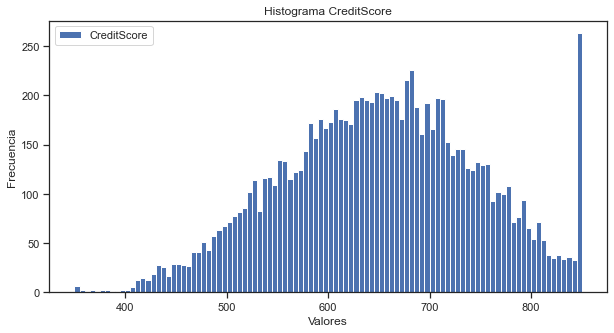

In [67]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable (la segunda)
ax1.hist(df['CreditScore'], label=['CreditScore'], bins = 100)  
ax1.legend(loc=0)

ax1.set_title('Histograma CreditScore')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');

El histograma es muy simétrico sin contar el valor de 850, por tanto escogemos los valores de codificación en función de los percentiles.  
Es decir, agruparemos la variable por 350-584, 585-652, 653-718, 719-850.

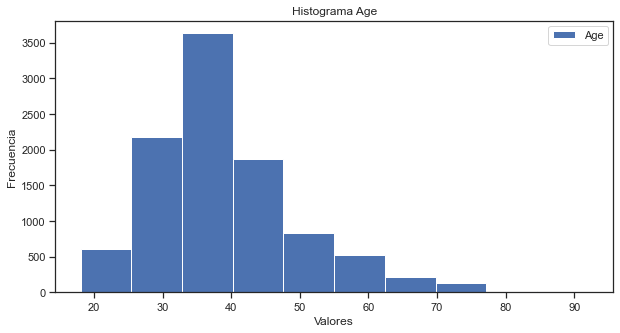

In [68]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable (la segunda)
ax1.hist(df['Age'], label=['Age'], bins = 10)  
ax1.legend(loc=0)

ax1.set_title('Histograma Age')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');

Para la variable edad, no se observa simetría.  
Si hiciésemos la codificación por los pertentiles, sería de 18-31, de 32-36, 37-44 y de 45-82.  
Estas agrupaciones tienen poco sentido considerando el tiempo que puede llevar trabajando una persona y por tanto la cantidad de dinero en la cuenta, entre otros aspectos (en definitiva, tendrán un perfil de cuenta bancaria distinto). Para tener en cuenta las características propias de la variable edad y el resto de variables, decidimos codificarla por la "madurez" de la experiencia laboral.  

Es decir, agruparemos primero desde 18-25 (indicando un grupo de personas con pocos ahorros, poco numero de productos, etc), y otro grupo desde la edad de jubilación en adelante, 63 o más. Para el grupo restante entre 26 y 62 años, decidimos dividirlos de forma simétrica, ya que estaríamos agrupando de 26-44 y de 45-62, agrupando en personas que empiezan a tener una vida laboral más segura, comienzan a ahorrar, etc, y otro grupo de personas ya con un perfil bancario más maduro y asentado.


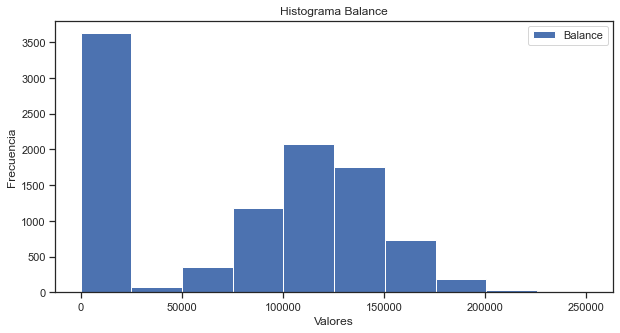

In [69]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable (la segunda)
ax1.hist(df['Balance'], label=['Balance'], bins = 10)  
ax1.legend(loc=0)

ax1.set_title('Histograma Balance')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');

La agrupación por percentiles es correcta, ya que quitando el valor 0, el histograma es bastante simétrico y por tanto la separación será adecuada.  
Es decir, agruparemos los valores de 'Balance' en 0, 0-97198, 97198-127644, 127644-250898.

Comenzamos con la codificación de las variables:

In [70]:
bins=[0,584,652,718,850]
names=[1,2,3,4]
df['CreditScore_Recode']=pd.cut(df['CreditScore'],bins,labels=names)
df[['CreditScore','CreditScore_Recode']].head(10)

,CreditScore,CreditScore_Recode
0,619,2
1,608,2
2,502,1
3,699,3
4,850,4
5,645,2
6,822,4
7,376,1
8,501,1
9,684,3


In [71]:
bins=[17,25,44,62,92]
names=[1,2,3,4]
df['Age_Recode']=pd.cut(df['Age'],bins,labels=names)
df[['Age','Age_Recode']].head(10)

,Age,Age_Recode
0,42,2
1,41,2
2,42,2
3,39,2
4,43,2
5,44,2
6,50,3
7,29,2
8,44,2
9,27,2


Para 'Balance', la codificación se hace de forma diferente, ya que uno de los grupos toma el valor 0 únicamente.  
Al ser una variable continua, no es relevante agrupar incluyendo números con decimales.

In [72]:
df.loc[df.Balance == 0, 'Balance_Recode'] = 1
df.loc[(df.Balance > 0) & (df.Balance <= 97198), 'Balance_Recode'] = 2
df.loc[(df.Balance > 97198) & (df.Balance <= 127644), 'Balance_Recode'] = 3
df.loc[(df.Balance > 127644) , 'Balance_Recode'] = 4
df[['Balance','Balance_Recode']].head(10)

,Balance,Balance_Recode
0,0.00,1.0
1,83807.86,2.0
2,159660.80,4.0
3,0.00,1.0
4,125510.82,3.0
5,113755.78,3.0
6,0.00,1.0
7,115046.74,3.0
8,142051.07,4.0
9,134603.88,4.0


Ahora podemos ver si estas nuevas variables predicen bien la variable 'Churn':

In [73]:
df.groupby('CreditScore_Recode')['Churn'].mean()
#Para 'CreditScore_Recode', la proporción de clientes que dejan el banco es muy similar a la media del conjunto de datos

CreditScore_Recode
1    0.219416
2    0.210316
3    0.181855
4    0.203004
Name: Churn, dtype: float64

In [74]:
df.groupby('Age_Recode')['Churn'].mean()

Age_Recode
1    0.075286
2    0.134345
3    0.490156
4    0.203343
Name: Churn, dtype: float64

Destacamos que para el primer grupo de edad (18-25 años) se obtiene un 7% de observaciones que se van del banco y para el tercer grupo (45-62 años) se obtiene casi un 50% de clientes que dejan el banco.  
Por tanto, teniendo en cuenta que el porcentaje medio de observaciones que dejan el banco es del 20%, podemos deducir que tener entre 18 y 25 años será una buena indicación de que se vaya a quedar en el banco, y tener entre 45 y 62 años, indicará que hay más probabilidades de que deje el banco.

In [75]:
df['Age_Recode'].value_counts()
#Confirmamos que se tienen observaciones suficientes en ambos grupos

2    7049
3    1981
1     611
4     359
Name: Age_Recode, dtype: int64

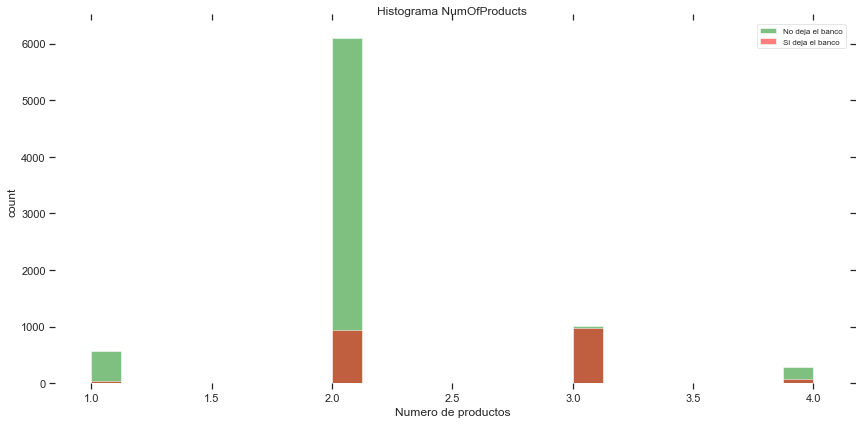

In [76]:
X = df['Age_Recode'].values
y = df['Churn'].values

label_dict = {0: 'No deja el banco', 1: 'Si deja el banco'}



feature_dict = {i:label for i,label in zip(
                range(2), #cambiar en funcion de cuantas variables haya
                  ('Numero de productos', ))}

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) #depende de cuantas variables haya 2x2=4 variables

 
cnt=0
# set bin sizes
min_b = math.floor(np.min(X))
max_b = math.ceil(np.max(X))
bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
for lab,col in zip(range(0,2), ('green', 'red')):
    axes.hist(X[(y==lab)],
                 color=col,
                label='%s' %label_dict[lab], #label_dict lo defines cuando usas LabelEncoder()
                bins=bins,
                alpha=0.5,)
ylims = axes.get_ylim()

    # plot annotation
leg = axes.legend(loc='upper right', fancybox=True, fontsize=8)
leg.get_frame().set_alpha(0.5)
axes.set_ylim([0, max(ylims)+2])
axes.set_xlabel(feature_dict[cnt])
axes.set_title('Histograma NumOfProducts') #cambiar el titulo

    # hide axis ticks
axes.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
axes.spines["top"].set_visible(False)  
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)    

axes.set_ylabel('count')

fig.tight_layout()       

plt.show()

En este gráfico queda representado lo explicado anteriormente.

Por último, para la variable 'Balance_Recode':

In [77]:
df.groupby('Balance_Recode')['Churn'].mean()

Balance_Recode
1.0    0.138236
2.0    0.208243
3.0    0.262800
4.0    0.236800
Name: Churn, dtype: float64

En 'Balance_Recode' obtenemos resultados similares a 'CreditScore_Recode', es decir que por si solas no predicen bien la variable 'Churn'.

Una vez visto esto, trataremos de obtener aún mejores resultados combinando los valores de las variables que a priori mejor clasifican los datos:

#### Geography - NumOfProducts

In [78]:
df.groupby(['Geography','NumOfProducts'])['Churn'].mean()

Geography  NumOfProducts
France     1                0.224344
           2                0.057034
           3                0.788462
           4                1.000000
Germany    1                0.428466
           2                0.121154
           3                0.895833
           4                1.000000
Spain      1                0.218673
           2                0.073542
           3                0.787879
           4                1.000000
Name: Churn, dtype: float64

Fijándonos en los valores de **Germany** con **3 y 4 productos**, observamos que hemos conseguido mejorar la proporción de clientes que dejan el banco con 3 productos del **82% al 89%** (con 4 productos era del 100%)

In [79]:
print(df[['Geography','NumOfProducts']].value_counts()['Germany',3]) #96 observaciones para el primer grupo
print(df[['Geography','NumOfProducts']].value_counts()['Germany',4]) #24 observaciones para el segundo grupo

96
24


#### Geography - Age_Recode

In [80]:
df.groupby(['Geography','Age_Recode'])['Churn'].mean()

Geography  Age_Recode
France     1             0.052288
           2             0.103638
           3             0.435412
           4             0.148352
Germany    1             0.111888
           2             0.222884
           3             0.653974
           4             0.345238
Spain      1             0.086420
           2             0.113024
           3             0.386221
           4             0.182796
Name: Churn, dtype: float64

En esta combinación, debemos atender a el valor de **Germany** con el **tercer grupo de edad**. De nuevo, hemos obtenido cierta mejora en la proporción de clientes con valor de 'Churn' igual a 1, pasando de un **49% a un 65%**.

In [81]:
df[['Geography','Age_Recode']].value_counts()['Germany',3] #604 observaciones para este grupo

604

#### NumOfProducts - Age_Recode

In [82]:
df.groupby(['NumOfProducts','Age_Recode'])['Churn'].mean()

NumOfProducts  Age_Recode
1              1             0.098246
               2             0.186569
               3             0.589180
               4             0.235602
2              1             0.037975
               2             0.049565
               3             0.219403
               4             0.116883
3              1             0.600000
               2             0.748299
               3             0.989583
               4             0.692308
4              1                  NaN
               2             1.000000
               3             1.000000
               4             1.000000
Name: Churn, dtype: float64

Para este último grupo, nos interesa tanto el valor de **2 productos** con el **primer grupo de edad**, ya que ambos sugerían que estos clientes tienen a quedarse en el banco; y los valores de **3 y 4 productos** con el **tercer grupo de edad**, que indicaban una mayor probabilidad de que dejen el banco.  
Por tanto, para la primera combinación de valores observamos una reducción de la proporción de salida del banco, **del 7% al 3%** y en la segunda y tercera combinación de valores, un aumento de la proporción de salida del banco del **82% al 99%**, y de nuevo del 100% con 4 productos.

In [83]:
print(df[['NumOfProducts','Age_Recode']].value_counts()[2,1]) #316 observaciones para el primer grupo
print(df[['NumOfProducts','Age_Recode']].value_counts()[3,3]) #96 observaciones para el segundo grupo
print(df[['NumOfProducts','Age_Recode']].value_counts()[4,3]) #32 observaciones para el tercer grupo

316
96
32


#### Geography - NumOfProducts - Age_Recode

La combinación que nos interesa es **Germany**, **3 y 4 productos**, **tercer grupo de edad**.  
Condicionamos las tres combinaciones por los valores de Germany para facilitar la visualización.

In [84]:
df.groupby(['Geography','NumOfProducts','Age_Recode'])['Churn'].mean()['Germany']

NumOfProducts  Age_Recode
1              1             0.133333
               2             0.310633
               3             0.742931
               4             0.395833
2              1             0.075758
               2             0.073548
               3             0.351190
               4             0.161290
3              1             0.500000
               2             0.833333
               3             1.000000
               4             1.000000
4              1                  NaN
               2             1.000000
               3             1.000000
               4                  NaN
Name: Churn, dtype: float64

Para los grupos indicados, obtenemos un **100%** de observaciones que han dejado el banco.

In [85]:
print(df[['Geography','NumOfProducts','Age_Recode']].value_counts()['Germany',3,3]) #32 observaciones para el primer grupo
print(df[['Geography','NumOfProducts','Age_Recode']].value_counts()['Germany',4,3]) #12 observaciones para el segundo grupo

35
12


#### Conclusiones

Las variables que a priori mejor clasifican una observación en función de si deja el banco o no son **'Geography'**, **'NumOfProducts'** y **'Age_Recode'**.  

En particular, clientes con 2 productos adquiridos y entre 18-25 años van a tener una probabilidad muy alta de quedarse en el banco, y, por otra parte, clientes alemanes con 3 o 4 productos adquiridos o de 45-62 años tendrán a priori una probabilidad muy alta de irse del banco. Lo mismo ocurre con clientes con 3 o 4 productos y de 45-62 años, y también, clientes alemanes, con 3 o 4 productos y de 45-62 años.

Lógicamente, cuanto más restrictivas son las condiciones que deben cumplir los datos, menos observaciones hay.  
Por ello, teniendo en cuenta las combinaciones con cerca de 100 observaciones, concluimos que las combinaciones más reveladoras son: 

Para **predecir que un cliente se irá**: alemanes con 3 productos, alemanes de 45-62 años y clientes con 3 productos y de 45-62 años.  
Para **predecir que un cliente se quedará**: clientes con 2 productos y de 18-25 años.

### 5. Missing

In [86]:
#Veamos ahora si hay valores missing:
df.isna().any() #columnas que tienen al menos 1 NaN
#No hay ningún valor missing en el dataframe 

CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
Churn                 False
CreditScore_Recode    False
Age_Recode            False
Balance_Recode        False
dtype: bool

### 6. Normalidad

A continuación vamos a estudiar la normalidad en las variables 'Age', 'CreditScore'y 'Balance'. Además de éstas, estudiaremos la normalidad en la variable 'Balance_Recode'.

In [3]:
#Importamos las librerias necesarias
import scipy
from scipy import stats

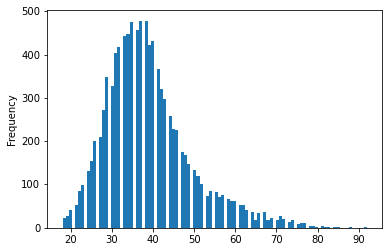

In [13]:
df.Age.plot.hist(bins=100)
plt.show()

Se puede apreciar en el histograma que los datos no siguen una distribución normal, sobretodo por la diferencia entre las colas. Pero para segurarnos de ello, vamos a realizar el test de Kolmogorov-Smirnov.

In [5]:
x = df['Age']

x = (x - x.mean()) / x.std()

ks_results = scipy.stats.kstest(x, cdf='norm')

matrix_ks = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(x) - 1, ks_results[0], ks_results[1]]
]
matrix_ks

[['', 'DF', 'Test Statistic', 'p-value'],
 ['Sample Data', 9999, 0.10095882841144077, 3.463527589032954e-89]]

Analizando los resultados, el p-valor es aproximadamente 0.0, por lo que el p-valor < 0.05 y por tanto tenemos una fuerte evidencia para rechazar la hipótesis nula de normalidad.

Analizamos ahora la variable 'CreditScore'.

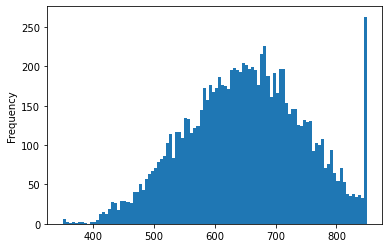

In [10]:
df.CreditScore.plot.hist(bins=100)
plt.show()

Analizando el histograma, podemos ver cierta tendencia a la normalidad si no fuera por la diferencia en las colas y por la acumulación de datos en la columna de la derecha. Por ello, realizaremos el test de Kolmogorov-Smirnov.

In [11]:
x = df['CreditScore']

x = (x - x.mean()) / x.std()

ks_results = scipy.stats.kstest(x, cdf='norm')

matrix_ks = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(x) - 1, ks_results[0], ks_results[1]]
]
matrix_ks

[['', 'DF', 'Test Statistic', 'p-value'],
 ['Sample Data', 9999, 0.01951926303573892, 0.0009679059703485127]]

Analizando los resultados, el p-valor es aproximadamente 0.0, por lo que el p-valor < 0.05 y por tanto tenemos una fuerte evidencia para rechazar la hipótesis nula de normalidad.

Analizamos la variable 'Balance'.

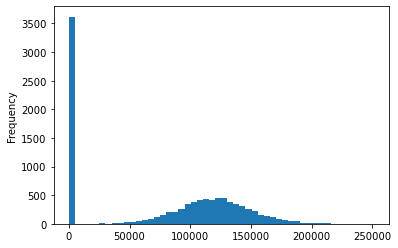

In [23]:
df.Balance.plot.hist(bins=50)
plt.show()

Esta variable no sigue una distribución normal a causa de la acumulación de datos en el valor 0. Si no fuera por esa columna podríamos pensar que sigue una distribución normal, pero no es el caso. Realizaremos el test de Kolmogorov-Smirnov para verificarlo.

In [24]:
x = df['Balance']

x = (x - x.mean()) / x.std()

ks_results = scipy.stats.kstest(x, cdf='norm')

matrix_ks = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(x) - 1, ks_results[0], ks_results[1]]
]
matrix_ks

[['', 'DF', 'Test Statistic', 'p-value'],
 ['Sample Data', 9999, 0.2515604625693143, 0.0]]

Analizando los resultados, el p-valor es 0.0, por lo que el p-valor < 0.05 y por tanto tenemos una fuerte evidencia para rechazar la hipótesis nula de normalidad.

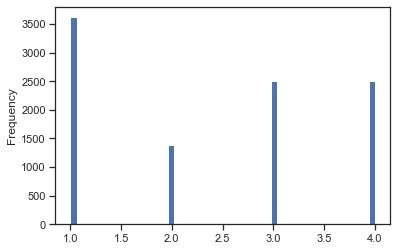

In [88]:
df.Balance_Recode.plot.hist(bins=50)
plt.show()

In [89]:
x = df['Balance_Recode']

x = (x - x.mean()) / x.std()

ks_results = scipy.stats.kstest(x, cdf='norm')

matrix_ks = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(x) - 1, ks_results[0], ks_results[1]]
]
matrix_ks

[['', 'DF', 'Test Statistic', 'p-value'],
 ['Sample Data', 9999, 0.23632812877940712, 0.0]]

Analizando los resultados, el p-valor es aproximadamente 0.0, por lo que el p-valor < 0.05 y por tanto tenemos una fuerte evidencia para rechazar la hipótesis nula de normalidad.

### 7. Correlaciones

En este apartado, vamos a calcular y analizar las correlaciones de nuestras variables.

In [90]:
df.corr(method="pearson")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,Balance_Recode
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.027094,0.004713
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,0.285323,0.023917
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,-0.014001,-0.011005
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.118533,0.969034
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,-0.047820,-0.287732
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.007138,-0.008614
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.156128,-0.012603
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,1.000000,0.112990
Balance_Recode,0.004713,0.023917,-0.011005,0.969034,-0.287732,-0.008614,-0.012603,0.112990,1.000000


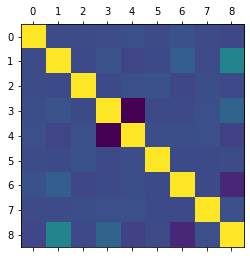

In [30]:
plt.matshow(df.corr())

Analizando la matriz de correlaciones, observamos que todas las correlaciones son muy bajas. Podemos destacar la correlación entre Churn y Age con el coeficiente más alto, 0.285323.

## II. Uso y validación de modelos

Con estos datos, se van a realizar los modelos de **Regresión Logística**, **Árbol de decisión** y **Naive-Bayes**.
Al tener unos datos desbalanceados, con un 20% de observaciones con valor 'Churn'= 1, decidimos relizar un ajuste de desbalanceo en los modelos. 

En los dos primeros modelos, la propia función del modelo tiene un parámetro que reliza este ajuste, asignando pesos a las observaciones para que éstas estén 'equilibradas'. En el caso de Naive-Bayes, se utilizará el método de **oversampling** y **undersampling** y veremos con cuál se obtienen mejores resultados.

Una vez hecho esto, elegiremos el modelo que mejores resultados ofrece y trataremos mejorarlo mediante la búsqueda de hiperparámetros.

A la hora de elegir las variables que incluiremos en los modelos, hemos decidido incorporar en un primer momento las variables que a priori mejor clasifican las observaciones ('Geography', 'NumOfProducts', 'Age_Recode') y ver qué resultados se obtienen.  

Después se incluirán el resto de variables que tenían cierta influencia en la predicción de 'Churn' ('Gender', 'IsActiveMember', 'Balance_Recode').  
Trataremos de ver cómo mejoran los resultados al incluir más variables. Si con estas variables seguimos sin obtener buenos resultados, intentaremos buscar otras alternativas, sustituyendo ciertas variables por otras que no hayamos incluido o cambiando los parámetros del modelo.

### 1. Árbol de decisión

En el caso de los árboles de decisión, una muy buena forma de ver lo mucho o poco que influyen las variables en el modelo es con el **gráfico de importancia** .  
Lo que se hará en primer lugar es probar con un único modelo (sin realizar CV sobre los datos de train y test) y ver su gráfico de importancia (con 'Geography', 'NumOfProducts', 'Age_Recode'). Después, incluiremos las otras tres variables que a priori más podrían influir en el modelo ('Gender', 'IsActiveMember', 'Balance_Recode') y veremos el gráfico de importancia.  
Según los resultados que obtengamos, seguiremos incluyendo o descartando variables del modelo, hasta que tengamos únicamente variables que tengan una importancia significativa.

Entonces, realizaremos un CV sobre los datos de train y test para obtener medidas robustas de la precisión del modelo y poder comprarlo con los resultados de Regresión Logística y Naive-Bayes. En este paso, también estudiaremos el árbol que produce el modelo.

#### 1.1 Modelo con 'Geography', 'Age_Recode' y 'NumOfProducts'

Comenzamos codificando la variable 'Geography' a numérica.

In [92]:
X1 = df.loc[:, 'Geography'].values

enc = LabelEncoder()
label_encoder = enc.fit(X1)
X1 = label_encoder.transform(X1)+1

Incluimos la variable en el dataset con nombre 'X1' y comprobamos los resultados mostrando los 10 primeros valores del dataset.

In [93]:
df['Geography_Num']=X1
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3
5,645,Spain,Male,44,8,113755.78,2,1,0,1,2,2,3.0,3
6,822,France,Male,50,7,0.00,2,1,1,0,4,3,1.0,1
7,376,Germany,Female,29,4,115046.74,4,1,0,1,1,2,3.0,2
8,501,France,Male,44,4,142051.07,2,0,1,0,1,2,4.0,1
9,684,France,Male,27,2,134603.88,1,1,1,0,3,2,4.0,1


La asignación de valores es:  
{1: 'France', 2: 'Germany', 3:'Spain'}

Definimos los datos del primer modelo con las tres variables que a priori mejor predicen el valor de la variable 'Churn'.

In [94]:
X=df.loc[:,['Geography_Num','Age_Recode','NumOfProducts']].values
y=df['Churn'].values

Importamos los módulos de split de datos en train y test y el del árbol de decisión y realizamos la partición de los datos.

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.tree import DecisionTreeClassifier

Construimos un único modelo para ver su gráfico de importancia.

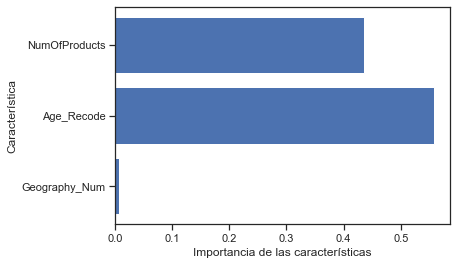

In [96]:
model=DecisionTreeClassifier(max_depth=3, class_weight='balanced') #construimos el modelo con el ajuste de desbalanceo y 3 niveles de profundidad
model.fit(X_train,y_train)
model.feature_importances_ #las importancias de cada variable

caract=X.shape[1]
plt.barh(range(caract), model.feature_importances_) #creamos el gráfico de importancia
plt.yticks(np.arange(caract),['Geography_Num','Age_Recode','NumOfProducts'])
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

El modelo opta por asignar mucha importancia a NumOfProducts y Age_Recode, y muy poca a Geography_Num.  
Esta era una de las combinaciones de variables que habíamos predicho que podía dar buenos resultados.

Ahora se hará un modelo incluyendo tres nuevas variables: 'Gender', 'IsActiveMember' y 'Balance_Recode'

#### 1.2 Modelo incluyendo 'Gender', 'IsActiveMember' y 'Balance_Recode'

Comenzamos recodificando la variable 'Gender' a numérica y mostrando el nuevo dataset.

In [97]:
X2 = df.loc[:, 'Gender'].values

enc = LabelEncoder()
label_encoder = enc.fit(X2)
X2 = label_encoder.transform(X2)+1

df['Gender_Num']=X2
df.head(10) #Female=1,  Male=2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num,Gender_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3,1
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3,1
5,645,Spain,Male,44,8,113755.78,2,1,0,1,2,2,3.0,3,2
6,822,France,Male,50,7,0.00,2,1,1,0,4,3,1.0,1,2
7,376,Germany,Female,29,4,115046.74,4,1,0,1,1,2,3.0,2,1
8,501,France,Male,44,4,142051.07,2,0,1,0,1,2,4.0,1,2
9,684,France,Male,27,2,134603.88,1,1,1,0,3,2,4.0,1,2


Definimos los datos que se van a usar.

In [98]:
X=df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts', 'Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y=df['Churn'].values

Realizamos la partición de los datos, construimos el modelo y representamos su gráfico de importancia.

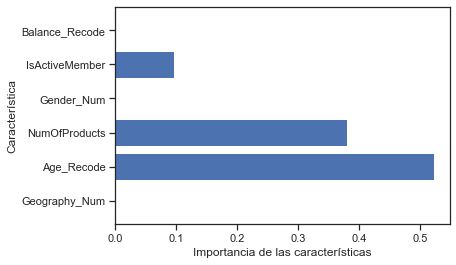

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

model=DecisionTreeClassifier(max_depth=3,class_weight='balanced') #construimos el modelo con el ajuste de desbalanceo y 3 niveles de profundidad
model.fit(X_train,y_train)
model.feature_importances_ #las importancias de cada variable

caract=X.shape[1]
plt.barh(range(caract), model.feature_importances_) #creamos el gráfico de importancia
plt.yticks(np.arange(caract),['Geography_Num','Age_Recode','NumOfProducts','Gender_Num', 'IsActiveMember', 'Balance_Recode'])
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

En este caso, las variables con más importancia siguen siendo 'NumOfProducts' y 'Age_Recode' y se aprecia también una importancia considerable en 'IsActiveMember'.

Ahora, realizaremos un modelo con todas las variables para ver si al incluirlas todas aparece otra variable con una importancia signficativa que estemos pasando por alto, o quizás otra combinación totalmente diferente.

#### 1.3 Modelo con todas las variables

Para las variables que originalmente eran numéricas y recodificamos en categóricas para estudiar su influencia a priori en la variable de clasificación ('CreditScore', 'Age', 'Balance'), se van a incluir las originales a no ser que se hubiese obtenido cierta influencia con las recodificadas.  
Ya que podemos intuir que las recodificadas que no tuvieron influencia a priori seguramente no lo tengan, pero cabe la posibilidad de que las numéricas sí lo tengan.

Es decir, incluiremos 'CreditScore', 'Age_Recode', 'Balance'.

Obsevamos el dataset que tenemos actualmente:

In [100]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num,Gender_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3,1
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3,1


Las variables que queremos incluir son 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Age_Recode', 'Geography_Num', 'Gender_Num'

Cargamos los datos

In [101]:
X=df.loc[:,['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Age_Recode', 
         'Geography_Num', 'Gender_Num']].values
y=df['Churn'].values

De nuevo, definimos los datos de train y test, construimos el modelo con el ajuste de desbalanceo y 3 niveles de profundidad, y representamos su gráfico de importancia.

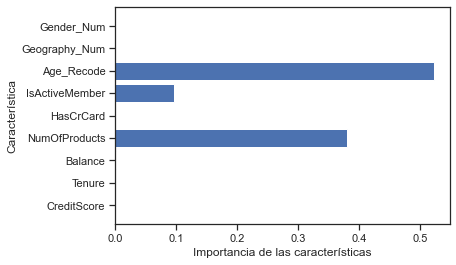

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

model=DecisionTreeClassifier(max_depth=3,class_weight='balanced') 
model.fit(X_train,y_train)
model.feature_importances_ 

caract=X.shape[1]
plt.barh(range(caract), model.feature_importances_) #creamos el gráfico de importancia
plt.yticks(np.arange(caract),['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Age_Recode', 
         'Geography_Num', 'Gender_Num'])
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

En este caso, una vez más las variables con más importancia (y las únicas con importancia significativa) son 'Age_Recode', 'IsActiveMember' y 'NumOfProducts'.

Ahora desarrollaremos más en profundidad este modelo para obtener medidas de precisión, graficaremos el árbol que produce, y estudiaremos la matriz de confusión (muy útil en datos desbalanceados).

Cargamos los datos y construimos el modelo:

In [103]:
X=df.loc[:,['Age_Recode', 'NumOfProducts', 'IsActiveMember']].values
y=df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

model=DecisionTreeClassifier(max_depth=3,class_weight='balanced') 
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

Primero, estudiaremos el árbol de decision:

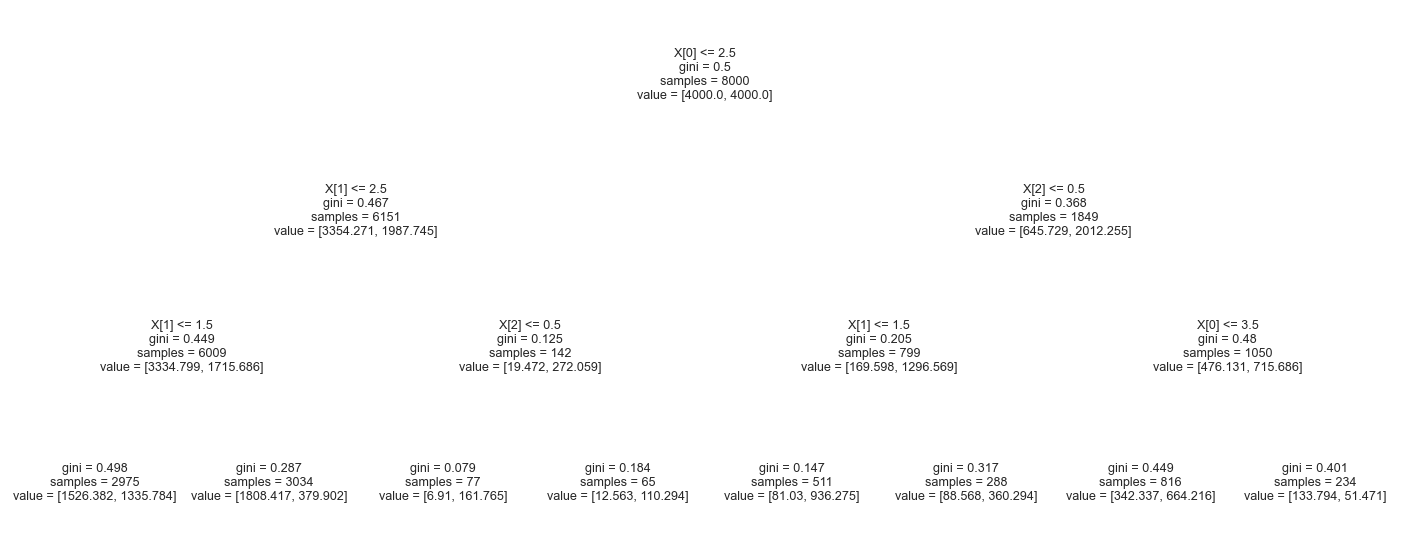

In [104]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(model);

El árbol comienza separando las observaciones del grupo de edad 1 o 2 (18-44 años) y el resto (45-92).  
En el primer nivel, la separación no es buena, ya que los índices de Gini están próximos a 0.5 en ambos subnodos.

Las siguientes separaciones se tiene por un lado entre las observaciones con 1 o 2 productos, y por el lado derecho las personas que son o no son miembros activos.  
En el segundo nivel resultante de estas separaciones sí tiene en algún caso buena separación (segundo y tercer subnodo).  
Concretamente, fijándonos en el segundo subnodo, los clientes que tengan entre **18-44 años**, con **3 o más productos** adquiridos muy probablmente **dejarán** el banco.  
En cuanto al tercer subnodo, los clientes de **más de 44 años** que **no sean miembros activos** también será muy probable que **dejen** el banco.

Continuando al tercer y último nivel, se obtienen separaciones aceptables en la segunda, tercera, cuarta y quinta hoja.
La más destacable es la segunda hoja, el resto de hojas provienen de subnodos con buena clasificación.
En esta segunda hoja, además, se hace una agrupación bastante pura de los clientes que **se quedan** en el banco.  
Podemos concluir que los clientes entre **18 y 44 años** y con **2 productos**, es muy probable que se queden en el banco.

Las combinaciones que mejor predecirían a priori redactadas en el preproceso fueron:

Para predecir que un cliente **se irá**: alemanes con 3 productos, alemanes de 45-62 años y clientes con 3 productos y de 45-62 años.  
Para predecir que un cliente **se quedará**: clientes con 2 productos y de 18-25 años.

Observamos que las combinaciones que mejor predicen **no coinciden** con las predichas en el estudio del preproceso (en el caso de predecir que se quede se acerca mucho), aunque sí conseguimos predecir 2 de las variables con más influencia.

Estudiando el árbol en conjunto, los resultados no parecen muy prometedores ya que se dejan muchas combinaciones de valores de las variables sin asignar una predicción clara.  
Por ejemplo, fijándonos en el lado derecho el árbol, si los clientes tienen entre 45 y 92 años, no se tendrá una buena predicción a no ser que no sean miembros activos y tengan 1 producto, una condición muy específica y restrictiva.

Ahora evaluaremos la matriz de confusión y posteriormente el resto de métricas.  
Para ello, necesitamos los valores de test predichos por nuestro modelo.

In [105]:
y_pred=model.predict(X_test) #defino valores perdichos de test

from sklearn import metrics
C = metrics.confusion_matrix(y_test, y_pred)
print(C)

[[1377  218]
 [ 156  249]]


Aquí queda muy claramente representado el **desbalanceo en los datos**, ya que al tener muchas menos observaciones de 'Churn'=1 que de 'Churn'=0, esto hace que sea mucho más facil predecir si un cliente se queda (1377 de aciertos vs 218 fallos) que si se va (249 aciertos vs 156 fallos de predecir que el cliente se quedaba cuando en realidad se iba).

Ahora, realizaremos un CV sobre los datos de train y test para obtener unas medidas robustas de la precisión de nuestro modelo.

Podemos ver las métricas disponibles de esta manera:

In [106]:
import sklearn.metrics
sklearn.metrics.SCORERS.keys() 

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Algunas métricas están hechas para tratar mejor con datos desbalanceados, ésas son las que vamos a usar ya que aún haciendo el ajuste de desbalanceo en el modelo, los resultados no son buenos.
En concreto éstas métricas son: 'balanced_accuracy' y 'f1_weighted.

Se puede ver su explicación en los siguientes enlaces:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [107]:
from sklearn.model_selection import cross_validate

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0) #barajamos los datos

scoring = ['balanced_accuracy','f1_weighted'] #métricas a evaluar
cv = cross_validate(model, X, y, cv=5, scoring=scoring) #construimos el modelo de CV con 5 particiones

cv 
   

{'fit_time': array([0.00598454, 0.00299215, 0.004987  , 0.00299191, 0.00499821]),
 'score_time': array([0.00394988, 0.00398993, 0.00299215, 0.00399089, 0.00297832]),
 'test_balanced_accuracy': array([0.73992945, 0.70861617, 0.71909891, 0.70205193, 0.70727412]),
 'test_f1_weighted': array([0.81776195, 0.8039161 , 0.8103988 , 0.79979973, 0.79212043])}

Calculamos la media de las medidas de precisión:

In [108]:
print(cv['test_balanced_accuracy'].mean())
print(cv['test_f1_weighted'].mean())

0.715394114805178
0.8047994012800055


### 2. Regresión Logística

#### 2.1 Modelo con 'Geography', 'Age_Recode' y 'NumOfProducts'

Definimos los datos del primer modelo con las tres variables que a priori mejor predicen el valor de la variable 'Churn'.

Antes de comenzar con el modelo, debemos realizar una codificación para la variable Geography.

In [109]:
X1 = df.loc[:, 'Geography'].values

enc = LabelEncoder()
label_encoder = enc.fit(X1)
X1 = label_encoder.transform(X1)+1

df['Geography_Num']=X1
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num,Gender_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3,1
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3,1
5,645,Spain,Male,44,8,113755.78,2,1,0,1,2,2,3.0,3,2
6,822,France,Male,50,7,0.00,2,1,1,0,4,3,1.0,1,2
7,376,Germany,Female,29,4,115046.74,4,1,0,1,1,2,3.0,2,1
8,501,France,Male,44,4,142051.07,2,0,1,0,1,2,4.0,1,2
9,684,France,Male,27,2,134603.88,1,1,1,0,3,2,4.0,1,2


In [110]:
X=df.loc[:,['Geography_Num','Age_Recode','NumOfProducts']].values
y=df['Churn'].values

Importamos los módulos para realizar la partición de datos en train y test.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Construimos el modelo de regresión logística para las variables definidas anteriormente.

In [112]:
from sklearn.linear_model import LogisticRegression

#defino el algoritmo a utilizar
algoritmo = LogisticRegression(class_weight = "balanced")
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#realizo una prediccion
y_pred = algoritmo.predict(X_test)

In [113]:
print('Coeficientes: ', algoritmo.coef_)
print('Término independiente: ', algoritmo.intercept_)

Coeficientes:  [[ 0.11244881  1.16836199 -0.12781629]]
Término independiente:  [-2.71851935]


Aquí obtenemos los coeficientes de la recta. Tanto 'Geography_num' como 'Age_Recode' tienen una relación directa con 'Churn' mientras que 'NumOfProducts' tiene una relación inversa.

Además, el término independiente para este modelo es negativo.

La variable con más importancia es la variable 'Age_Recode'

Ahora analizaremos la matriz de confusión, la precisión, la exactitud, la sensibilidad y el puntaje F1 de este modelo.

In [114]:
#Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1339  247]
 [ 216  198]]


La matriz nos indica que cuenta con 1364 datos verdaderos positivos, es decir que en los datos reales eran 1 y el modelo los predijo correctamente. 

Por otra parte, tenemos 212 datos verdaderos negativos, esto quiere decir datos reales que eran 0 y el modelo los predijo como tal. 

Ahora analizamos los datos que el modelo no ha predecido bien. Comenzamos con los datos falsos negativos, en total fueron 243, esto quiere decir que eran 1 pero el modelo los predijo como 0. En cuanto a los falsos positivos, tenemos 181, que eran en realidad 0 y el modelo los predijo como 1. 

La matriz nos indica que 424 datos no se han predecido correctamente. Es una cantidad de datos bastante alta. Hay que tener en cuenta que aquí sólo estamos evaluando el conjunto de datos de pruebas que representa solamente el 20% de nuestros datos.

Comenzamos calculando la presición del modelo. 

In [115]:
#calculo la precision del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.4449438202247191


No es una buena precisión del modelo. Esto coincide con lo analizado en la matriz de confusión, demostrando que el modelo no es muy bueno.

Calculamos ahora la exactitud del modelo.

In [116]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7685


Aplicando este comando a los datos de pruebas, obtenemos una exactitud algo alta en comparación con los resultados de precisión y la matriz de confusiones.

Veamos ahora la sensibilidad del modelo, también concocida como recall del algoritmo. 

In [117]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.4782608695652174


Obtenemos una sensibilidad del 0.5086. Este dato sigue en la línea de los anteriores.

Ahora calculamos el puntaje F1 que es una combinación entre la precisión y la sensibilidad.

In [118]:
#Calculo el PUntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.4610011641443539


Y logicamente, al tener una precisión y una sensibilidad bajas, obtenemos un puntaje F1 bajo. 

Como no hemos obtenido unos resultados muy buenos con este modelo, vamos a introducir mas variables, a ver si nuestro modelo mejora.

#### 2.2 Modelo incluyendo 'Gender', 'IsActiveMember' y 'Balance_Recode'

Lo primero, para definir este  modelo es recodificar la variable 'Gender' a numérica.

In [119]:
X2 = df.loc[:, 'Gender'].values

enc = LabelEncoder()
label_encoder = enc.fit(X2)
X2 = label_encoder.transform(X2)+1

df['Gender_Num']=X2
df.head(10) #Female=1,  Male=2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num,Gender_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3,1
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3,1
5,645,Spain,Male,44,8,113755.78,2,1,0,1,2,2,3.0,3,2
6,822,France,Male,50,7,0.00,2,1,1,0,4,3,1.0,1,2
7,376,Germany,Female,29,4,115046.74,4,1,0,1,1,2,3.0,2,1
8,501,France,Male,44,4,142051.07,2,0,1,0,1,2,4.0,1,2
9,684,France,Male,27,2,134603.88,1,1,1,0,3,2,4.0,1,2


Ya recodificada, definimos los datos que vamos a usar para este modelo.

In [120]:
X=df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts', 'Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y=df['Churn'].values

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Construimos el modelo de regresión logística para el nuevo grupo de variables.

In [122]:
#defino el algoritmo a utilizar
algoritmo = LogisticRegression(class_weight = "balanced")
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#realizo una prediccion
y_pred = algoritmo.predict(X_test)

In [123]:
print('Coeficientes: ', algoritmo.coef_)
print('Término independiente: ', algoritmo.intercept_)

Coeficientes:  [[ 0.07441227  1.22568191 -0.01046622 -0.51034426 -0.85361686  0.26787259]]
Término independiente:  [-2.46877909]


Obtenemos los coeficientes de la recta. Todas tienen una relacion directa excepto 'NumOfProducts', 'Gender_num' y 'IsActiveMember'.

Además, el término independiente para este modelo es negativo.

Podemos ver que la variable con más importancia en este modelo es 'Age_Recode' como en el modelo anterior.

Ahora analizaremos la matriz de confusión, la precisión, la exactitud, la sensibilidad y el puntaje F1 de este modelo.

In [124]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1138  449]
 [ 146  267]]


In [125]:
#calculo la precision del modelo
precision = precision_score(y_test, y_pred)

print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.3729050279329609


In [126]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)

print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7025


In [127]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred)

print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.6464891041162227


In [128]:
#Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred)

print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.4729849424269264


Recopilamos los datos para este modelo y analizamos

In [129]:
print('Matriz de Confusión:')
print(matriz)
print('Precisión del modelo:', precision)
print('Exactitud del modelo:', exactitud)
print('Sensibilidad del modelo:', sensibilidad)
print('Puntaje F1 del modelo:', puntajef1)

Matriz de Confusión:
[[1138  449]
 [ 146  267]]
Precisión del modelo: 0.3729050279329609
Exactitud del modelo: 0.7025
Sensibilidad del modelo: 0.6464891041162227
Puntaje F1 del modelo: 0.4729849424269264


Analizando estos resultados con respecto al modelo anterior, tenemos que la matriz de confusion del segundo modelo da más datos predichos incorrectamente. En este modelo en total son 605. 

Respecto a la precisión del modelo, la exactitud y el puntaje F1, el segundo modelo tiene una precisión, una exactitud y un puntaje F1 un poco más baja que el anterior. 

Sin embargo, la sensibilidad  de este modelo es mas alta que en modelo anterior. 

#### 2.3 Modelo con todas las variables

Finalmente, vamos a analizar un modelo con todas las variables, a ver si conseguimos que nuestro modelo mejore en todos los aspectos. 

In [130]:
X=df.loc[:,['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Age_Recode', 
         'Geography_Num', 'Gender_Num']].values
y=df['Churn'].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Construimos el modelo de regresión logística para el nuevo grupo de variables.

In [132]:
#defino el algoritmo a utilizar
algoritmo = LogisticRegression(class_weight = "balanced")
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#realizo una prediccion
y_pred = algoritmo.predict(X_test)

In [133]:
print('Coeficientes: ', algoritmo.coef_)
print('Término independiente: ', algoritmo.intercept_)

Coeficientes:  [[-6.35956317e-04 -5.26481832e-06  5.05029934e-06 -1.83428746e-06
  -7.16311025e-07 -1.67835779e-06  4.22745409e-07 -1.08060710e-06
  -2.23242932e-06]]
Término independiente:  [-9.25383096e-07]


Ahora analizaremos la matriz de confusión, la precisión, la exactitud, la sensibilidad y el puntaje F1 de este modelo.

In [134]:
#Verifico la matriz de confusion
matriz = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[726 859]
 [133 282]]


In [135]:
#calculo la precision del modelo
precision = precision_score(y_test, y_pred)

print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)

print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred)

print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred)

print('Puntaje F1 del modelo:')
print(puntajef1)

Precisión del modelo:
0.24715162138475022
Exactitud del modelo:
0.504
Sensibilidad del modelo:
0.6795180722891566
Puntaje F1 del modelo:
0.3624678663239075


Analizando todos los resultados obtenidos en este modelo, vemos que los datos clasificados erroneamente en la matriz de confusión se elevan bastante respecto a los otros dos modelos. En este último modelo, la precisión es bastante más baja que en los otros dos. Sin embargo, la sensibilidad se eleva un poco respecto al primer modelo. Y por último, la precisión y el puntaje es mas bajo que en los otros dos modelos.

En conclusión, haremos cross validation sobre el primer modelo ya que nos da la mayor precision y exactitud que el resto de modelos. A parte de esto, es el modelo que menor numero de datos clasificados erroneamente tiene.

### 2.4 Validación del modelo

Este es el modelo en el que se realizara el método de cross validation.

In [136]:
X=df.loc[:,['Geography_Num','Age_Recode','NumOfProducts']].values
y=df['Churn'].values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#defino el algoritmo a utilizar
algoritmo = LogisticRegression(class_weight = "balanced")
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#realizo una prediccion
y_pred = algoritmo.predict(X_test)

In [138]:
#Barajeamos los datos
X, y = shuffle(X, y, random_state=0)

De nuevo utilizamos las mismas métricas que en el modelo anterior:

In [139]:
reg = LogisticRegression()

scoring = ['balanced_accuracy', 'neg_mean_absolute_error']
cv = cross_validate(algoritmo, X, y, cv=5, scoring=scoring)

In [140]:
cv

{'fit_time': array([0.0149591 , 0.00997353, 0.01097345, 0.01296544, 0.01894951]),
 'score_time': array([0.00199485, 0.00398898, 0.00298953, 0.00398922, 0.00398922]),
 'test_balanced_accuracy': array([0.69106626, 0.66343848, 0.6801717 , 0.66890827, 0.67085427]),
 'test_neg_mean_absolute_error': array([-0.2255, -0.236 , -0.221 , -0.234 , -0.228 ])}

Media de las medidas de precisión.

In [141]:
print(cv['test_balanced_accuracy'].mean())

#Como el argumento es scoring, las métricas aparecen con el convenio de que cuanto más positiva, mejor.
#Por eso el MAE (cuanto más bajo, mejor, porque es un 'error') viene con signo opuesto (_neg_), 
#así que nosotros le cambiamos el signo.
MAE = - np.mean(cv['test_neg_mean_absolute_error'])
MAE

0.6748877942325238


0.22890000000000002

### 3. Naive-Bayes

In [142]:
#Importamos las librerias necesarias para poder trabajar este modelo
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB

A la hora de trabajar en Naive bayes dependeremos de los datos, para ello tenemos aquí en que casos debemos usar cada una de las 4 importaciones dadas anteriormente:
* Si son **features continuas**: usaremos una Gaussiana: ```GaussianNB```

* Si son **features categóricas binarias**: usaremos una Bernoulli: ```BernoulliNB```

* Si son **features categóricas con más de dos clases**: usaremos una Categórica: ```CategoricalNB```

* Si son **features de datos de conteo**: usaremos una Multinomial: ```MultinomialNB```

Probaremos 3 tipos de modelos:

#### 3.1 Modelo con 'Geography', 'Age_Recode'y 'NumOfProducts'

In [143]:
#Primero que debemos observar que el conjunto está o no desbalanceado
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [144]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [145]:
df['Age_Recode'].value_counts()

2    7049
3    1981
1     611
4     359
Name: Age_Recode, dtype: int64

In [146]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Claramente se trata de un conjunto demasiado desbalanceado, para ello vamos a comenzar el estudio.
Analizaremos dos tipos de estudio.

* Sin Ajustar los datos de desbalanceamiento.

* Ajustando los datos de desbalanceamiento aplicando técnicas como oversampling o undersampling.


#### Sin ajustar los datos

In [147]:
X1 = df.loc[:, 'Geography'].values

enc = LabelEncoder()
label_encoder = enc.fit(X1)
X1 = label_encoder.transform(X1)+1

df['Geography_Num']=X1
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num,Gender_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3,1
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3,1
5,645,Spain,Male,44,8,113755.78,2,1,0,1,2,2,3.0,3,2
6,822,France,Male,50,7,0.00,2,1,1,0,4,3,1.0,1,2
7,376,Germany,Female,29,4,115046.74,4,1,0,1,1,2,3.0,2,1
8,501,France,Male,44,4,142051.07,2,0,1,0,1,2,4.0,1,2
9,684,France,Male,27,2,134603.88,1,1,1,0,3,2,4.0,1,2


In [148]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
X = df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts']].values
y = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.8424


la Exactitud es la cantidad de predicciones positivas que fueron correctas, en nuestro caso es del 84% está bastante bien.
Para datasets ya desbalanceados, es más informativo poner la matriz de confusión, o calcular la tasa de falsos positivos o falsos negativos

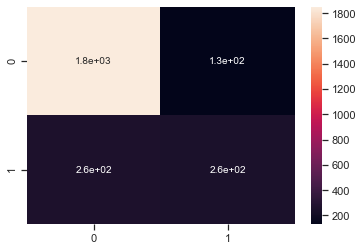

In [151]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Claramente, podemos notar un claro balanceado de los datos, con los falsos negativos, los cuales hay más respcto a verdaderos negativos.

In [152]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1980
           1       0.66      0.49      0.57       520

    accuracy                           0.84      2500
   macro avg       0.77      0.71      0.73      2500
weighted avg       0.83      0.84      0.83      2500



Podemos observar que el modelo tiene la clase 1 una precisión, es decir la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud (Cuanto menor es la dispersión mayor la precisión) es del 88% y un nivel de sensibilidad, es decir la proporción de casos positivos que fueron correctamente identificadas por el algoritmo es del 93%, lo cual nos indica que el modelo maneja perfectamente esta clase, no obstante la clase 2 presenta una baja precisión y un nivel bajo de recall, lo cual nos indica que El modelo no logra clasificar la clase correctamente.

#### Undersample

Para instalar la librería 'imblearn', antes hay que ejecutar el siguiente código en el prompt de Anaconda (sin comillas):

In [211]:
"conda install -c conda-forge imbalanced-learn"

'conda install -c conda-forge imbalanced-learn'

In [156]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [157]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X = df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts']].values
y = df['Churn'].values
X_over, y_over = undersample.fit_resample(X, y)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [159]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.7964659685863874


Aplicando la técnica undersample, nos damos cuenta que ha bajado un 5% con respecto al modelo sin desbalancear.

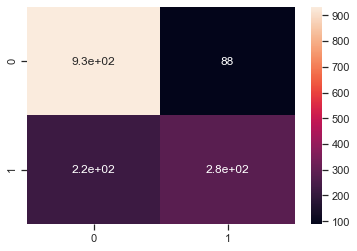

In [160]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Podemos notar una mejora clasificatoria respecto a los falsos positivos, que han sido clasificado mejor, pero los falsos negativos, aún siguen siendo mayores.

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1021
           1       0.76      0.56      0.65       507

    accuracy                           0.80      1528
   macro avg       0.79      0.74      0.75      1528
weighted avg       0.79      0.80      0.79      1528



Podemos observar que el modelo tiene la clase 1 una precisión del 81%, lo cual nos indica que su tratamiento ha sido peyorativo, respecto al modelo balanceado, en cambio el modelo 2 ha notado una mejora en precisión y en sensibilidad, aún así siguen siendo bajas.

#### Oversample

In [162]:
oversample = RandomOverSampler(sampling_strategy = 0.5)
X = df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts']].values
y = df['Churn'].values
X_over, y_over = oversample.fit_resample(X, y)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [164]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.7799732083054253


Aplicando la técnica oversample, nos damos cuenta que ha bajado un 7% con respecto al modelo sin desbalancear.

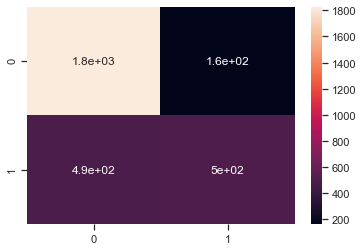

In [165]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Este modelo, tiene una peor clasificación de falsos positivos y falsos negativos con respecto a los otros casos.

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1989
           1       0.76      0.50      0.60       997

    accuracy                           0.78      2986
   macro avg       0.77      0.71      0.73      2986
weighted avg       0.78      0.78      0.77      2986



Podemos observar que el modelo tiene la clase 1 una precisión del 78% y su precisión ha bajado, lo cual nos indica que su tratamiento ha sido empeorar el modelo, respecto al modelo balanceado, en cambio el modelo 2 ha notado una mejora en precisión y en sensibilidad se ha mantenido estable, aún así siguen siendo bajas.

### 3.2 Modelo con 'Gender', 'IsActiveMember' y 'Balance_Recode'

In [167]:
#Primero que debemos observar que el conjunto está o no desbalanceado
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [168]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [169]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [170]:
df['Balance_Recode'].value_counts()

1.0    3617
4.0    2500
3.0    2500
2.0    1383
Name: Balance_Recode, dtype: int64

Claramente se trata de un conjunto demasiado desbalanceado, para ello vamos a comenzar el estudio.
Analizaremos dos tipos de estudio.

* Sin Ajustar los datos de desbalanceamiento.

* Ajustando los datos de desbalanceamiento aplicando técnicas como oversampling o undersampling.


In [171]:
X2 = df.loc[:, 'Gender'].values

enc = LabelEncoder()
label_encoder = enc.fit(X2)
X2 = label_encoder.transform(X2)+1

df['Gender_Num']=X2
df.head(10) #Female=1,  Male=2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Churn,CreditScore_Recode,Age_Recode,Balance_Recode,Geography_Num,Gender_Num
0,619,France,Female,42,2,0.00,1,1,1,1,2,2,1.0,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0,2,2,2.0,3,1
2,502,France,Female,42,8,159660.80,3,1,0,1,1,2,4.0,1,1
3,699,France,Female,39,1,0.00,2,0,0,0,3,2,1.0,1,1
4,850,Spain,Female,43,2,125510.82,1,1,1,0,4,2,3.0,3,1
5,645,Spain,Male,44,8,113755.78,2,1,0,1,2,2,3.0,3,2
6,822,France,Male,50,7,0.00,2,1,1,0,4,3,1.0,1,2
7,376,Germany,Female,29,4,115046.74,4,1,0,1,1,2,3.0,2,1
8,501,France,Male,44,4,142051.07,2,0,1,0,1,2,4.0,1,2
9,684,France,Male,27,2,134603.88,1,1,1,0,3,2,4.0,1,2


In [172]:
X = df.loc[:,['Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [173]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.792


En este nuevo modelo la tasa de acierto es más baja respecto al anterior.

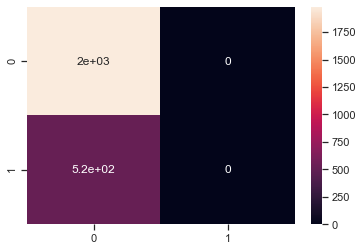

In [174]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Nos realiza una clasificación muy mal estructurada, no clasifica ningún negativo, se produce un claro desbalanceado.

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1980
           1       0.00      0.00      0.00       520

    accuracy                           0.79      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.79      0.70      2500



C:\Users\mzaba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Undersample

In [176]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X = df.loc[:,['Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y = df['Churn'].values
X_over, y_over = undersample.fit_resample(X, y)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [178]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.6695026178010471


La tasa de acierto ha empeorado al aplicar la técnica undersample de desbalanceado.

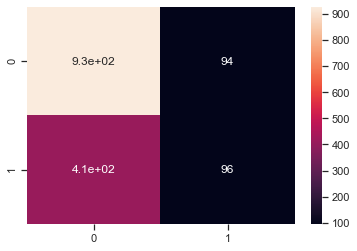

In [179]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

No obstante, la clasificación de los datos a mejorado al aplicar la técnica, pero no lo suficiente.

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79      1021
           1       0.51      0.19      0.28       507

    accuracy                           0.67      1528
   macro avg       0.60      0.55      0.53      1528
weighted avg       0.63      0.67      0.62      1528



Sigue produciendose desbalanceado de los datos, sobretodo en la clase 2.

#### Oversample

In [181]:
oversample = RandomOverSampler(sampling_strategy = 0.5)
X = df.loc[:,['Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y = df['Churn'].values
X_over, y_over = oversample.fit_resample(X, y)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [183]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.6758204956463496


La tasa de acierto respecto a la técnica de undersample se mantiene más o menos estable.

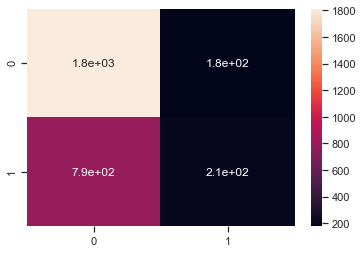

In [184]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Sigue produciendose desbalanceado de los datos.

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1989
           1       0.54      0.21      0.30       997

    accuracy                           0.68      2986
   macro avg       0.62      0.56      0.54      2986
weighted avg       0.64      0.68      0.63      2986



En la tabla, podemos apreciar que en la clase 2 es donde se producén.

### 3.3 Modelo con todas las variables

In [186]:
X = df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts', 'Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [188]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.6758204956463496


La tasa de acierto, estamos observando que es de un 68%, no es una tasa muy elevada.

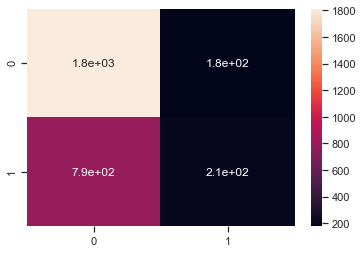

In [189]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Se produce un claro desbalandeado de los datos, respecto a los falsos negativos es donde más se está notando.

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1989
           1       0.54      0.21      0.30       997

    accuracy                           0.68      2986
   macro avg       0.62      0.56      0.54      2986
weighted avg       0.64      0.68      0.63      2986



La clase 2 es donde se nota el desbalanceado notablemente, con un bajo porcentaje de precisión y de sensibilidad. No obstante, se trata de un modelo desbalanceado, igual a la hora de aplicar técnicas, notamos una mejora de los datos.

#### Undersample

In [191]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X = df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts', 'Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y = df['Churn'].values
X_over, y_over = undersample.fit_resample(X, y)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [193]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.806282722513089


Al aplicar la técnica de Undersample, ya hemos notado una mejora en la tasa de acierto de un 80%, la cual es una tasa aceptable.

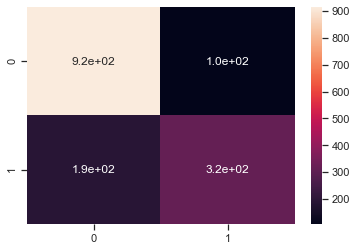

In [194]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

La técnica undersample, ha realizado una mejora a la hora del balanceado de los datos, los resultados han sido mejores.

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1021
           1       0.75      0.62      0.68       507

    accuracy                           0.81      1528
   macro avg       0.79      0.76      0.77      1528
weighted avg       0.80      0.81      0.80      1528



Se ha notado una mejora notable tanto en precisión como en sensibilidad a la hora de aplicar undersample.

#### Oversample

In [196]:
oversample = RandomOverSampler(sampling_strategy = 0.5)
X = df.loc[:,['Geography_Num', 'Age_Recode', 'NumOfProducts', 'Gender_Num', 'IsActiveMember', 'Balance_Recode']].values
y = df['Churn'].values
X_over, y_over = oversample.fit_resample(X, y)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=1)
model = CategoricalNB()
y_pred =model.fit(X_train, y_train).predict(X_test)

In [198]:
print('Tasa de acierto: ', accuracy_score(y_pred, y_test))

Tasa de acierto:  0.7776289350301406


La tasa de acierto con el método de balanceado de oversample ha mejorado pero en comparación con la técnica de undersample es un poco más baja.

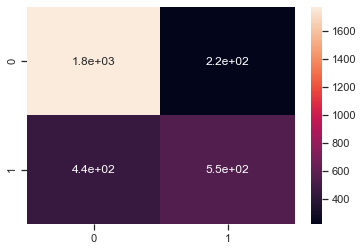

In [199]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(style="ticks")

Ha realizado una buen balanceado de los datos al predominar la tasa de verdaderos positivos y de verdaderos negativos.

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1989
           1       0.72      0.55      0.62       997

    accuracy                           0.78      2986
   macro avg       0.76      0.72      0.73      2986
weighted avg       0.77      0.78      0.77      2986



Se nota una mejora notable en la clase 2 respecto a la precisión y a la sensibilidad a la hora de aplicar la técnica oversample.

En conclusión, se ha notado muchisimo la mejora de los datos a la hora de aplicar las técnicas, pero ha quedado reflejado que la mejor ha sido la técnica undersample debido a que ha realizado una tasa de aciertos superior con respecto al método oversample y  tanto los valores de precisión y de sensibilidad han sido bastante superiores respecto al anterior modelo.

Ahora, realizaremos un CV sobre los datos de train y test para obtener unas medidas robustas de la precisión de nuestro modelo.

Podemos ver las métricas disponibles de esta manera:

In [201]:
sklearn.metrics.SCORERS.keys() 

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [202]:
X, y = shuffle(X, y, random_state=0) #barajamos los datos

scoring = ['balanced_accuracy','f1_weighted'] #métricas a evaluar
cv = cross_validate(model, X, y, cv=5, scoring=scoring) #construimos el modelo de CV con 5 particiones

cv 
   

{'fit_time': array([0.00398922, 0.00498581, 0.00602531, 0.0039525 , 0.00498629]),
 'score_time': array([0.0039885 , 0.00299287, 0.00298667, 0.00302863, 0.0029912 ]),
 'test_balanced_accuracy': array([0.71781951, 0.68830849, 0.70064749, 0.67497414, 0.69275914]),
 'test_f1_weighted': array([0.84427254, 0.82752938, 0.83623452, 0.82231466, 0.83267341])}

Calculamos la media de las medidas de precisión:

In [203]:
print(cv['test_balanced_accuracy'].mean())
print(cv['test_f1_weighted'].mean())

0.6949017541640427
0.8326049039355337


### 4. Desarrollamos el mejor modelo

Observando las métricas obtenidas al final del desarrollo de los tres modelos, podemos concluir que el modelo que mejores resultados ofrece es el del **árbol de decisión**. Por tanto, el siguiente paso será desarrollar más aún este modelo para obtener los mejores resultados posibles.  
Es decir, mediante la búsqueda de hiperparámetros.

El hiperparámetro a optimizar va a ser la profundidad del árbol, y se va a optimizar en los valores de [3,...,10].  
Se evaluará en la métrica 'f1_weighted' ya que está diseñada para ofrecer resultados fiables cuando los datos están desbalanceados, y el ajuste de desbalanceo del propio modelo no parece ofrecer buenos resultados.

In [207]:
from sklearn.model_selection import GridSearchCV

md = np.linspace(3, 10, 8)
h_parameters = {'max_depth':md} #incluimos el parámetro a optimizar (la profundidad del árbol) y los valores en los que vamos a optimizar

model=DecisionTreeClassifier(class_weight='balanced') 

# Definimos la búsqueda + CV, con la métrica a optimizar
cv = GridSearchCV(model, h_parameters, cv=10, n_jobs=-1, scoring='f1_weighted')

#Volvemos a cargar los datos
X=df.loc[:,['Age_Recode', 'NumOfProducts', 'IsActiveMember']].values
y=df['Churn'].values
cv.fit(X, y) #construimos el modelo
   
# Este atributo nos devuelve el mejor estimador
cv.best_estimator_ #te dice todos los parametros del modelo y mas cosas, miras los que te interesen



DecisionTreeClassifier(class_weight='balanced', max_depth=3.0)

El mejor modelo se tiene con **3 niveles** de profundidad.

In [208]:
cv.cv_results_

{'mean_fit_time': array([0.00638268, 0.00787771, 0.00727961, 0.00748081, 0.00698183,
        0.00698097, 0.00708036, 0.00708101]),
 'std_fit_time': array([0.0004887 , 0.00303997, 0.00077819, 0.00331546, 0.00063346,
        0.00118126, 0.00053579, 0.00069789]),
 'mean_score_time': array([0.00199442, 0.00199511, 0.003391  , 0.0020941 , 0.00468702,
        0.0017947 , 0.00189438, 0.00189545]),
 'std_score_time': array([0.00044596, 0.00044532, 0.00293097, 0.00082831, 0.00743667,
        0.00039912, 0.00029998, 0.00029867]),
 'param_max_depth': masked_array(data=[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3.0},
  {'max_depth': 4.0},
  {'max_depth': 5.0},
  {'max_depth': 6.0},
  {'max_depth': 7.0},
  {'max_depth': 8.0},
  {'max_depth': 9.0},
  {'max_depth': 10.0}],
 'split0_test_score': array([0.80463174, 0.73661264, 0.77404981, 0.77404981,

Calculamos la media de las métricas obtenidas en los modelos:

In [209]:
cv.cv_results_['mean_test_score'].mean()

0.7665283248125507

Obtenemos un 76% en la métrica 'f1_weighted'

## III. Conclusiones

La métrica f1 es una media armónica entre la precision y el recall, que respectivamente miden, en nuestro caso:  
de todos los clientes que el modelo etiqueta como que saldrán del banco, cuantos lo son realmente, y  
de todos los clientes que realmente salieron del banco, cuántos fueron predichos como tal.

Por tanto, hemos obtenido un modelo capaz de predecir con bastante precisión si un cliente del banco saldrá o no de él.

Una **estrategia** que podría adoptar el banco sería, para los clientes que prediga que se vayan a ir, ofrecerles diferentes recursos financieros para motivarles a quedarse. Es cierto que en media fallaremos un 24% de las veces, pero también conseguirían retener muchos clientes y posiblemente acabar con un beneficio neto.

Otra **aplicación** podría ser, para los clientes que se prediga que se quieren ir, estudiar cuáles son las razones por las que se querrían marchar. En la misma línea, se podría implementar varias acciones de fidelización para conseguir retenerlos, y ver cuáles de ellas son más efectivas, ya que estaríamos trabajando con una muestra que teóricamente se quieren marchar (aunque no estemos en lo cierto siempre).